In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
pd.set_option('display.max_columns', None)

In [116]:
df = pd.read_csv('train.csv')

In [117]:
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


#### Missing Values

In [118]:
feature_with_nan = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
print("Total: ", {len(feature_with_nan)})
for feature in feature_with_nan:
    print(f"{feature}: {df[feature].isnull().mean()} Missing Values")

Total:  {16}
loading: 0.00940910801656003 Missing Values
measurement_3: 0.014339480617237487 Missing Values
measurement_4: 0.020248400451637186 Missing Values
measurement_5: 0.02544222807677832 Missing Values
measurement_6: 0.029958599924727138 Missing Values
measurement_7: 0.035265336846066996 Missing Values
measurement_8: 0.03944298080541964 Missing Values
measurement_9: 0.046179902145276626 Missing Values
measurement_10: 0.048927361686112156 Missing Values
measurement_11: 0.0552502822732405 Missing Values
measurement_12: 0.060255927738050434 Missing Values
measurement_13: 0.06676703048550997 Missing Values
measurement_14: 0.07053067369213399 Missing Values
measurement_15: 0.0756115920210764 Missing Values
measurement_16: 0.07941287165976665 Missing Values
measurement_17: 0.08596161083929243 Missing Values


Checking if the missing values is important to predict target labels

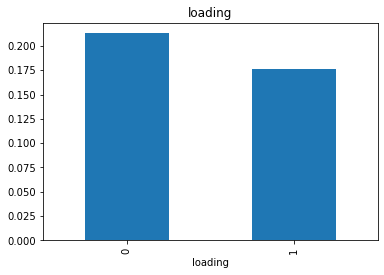

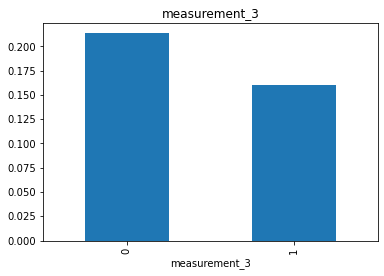

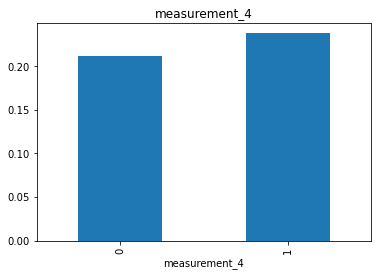

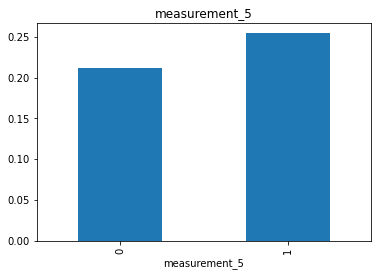

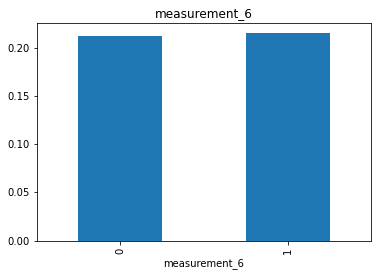

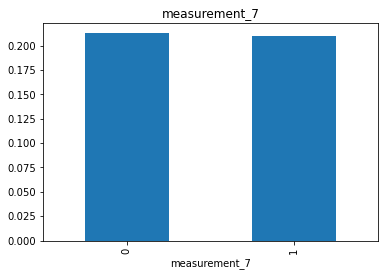

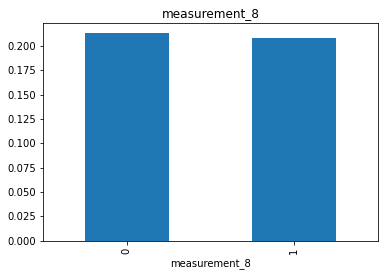

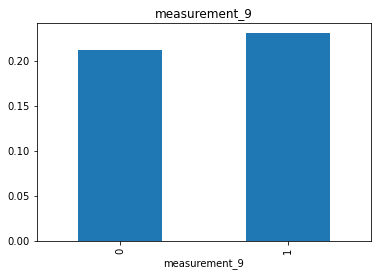

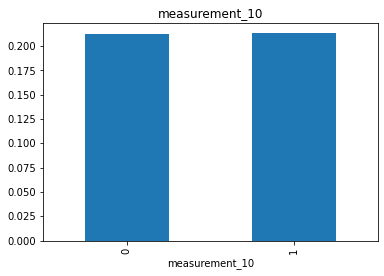

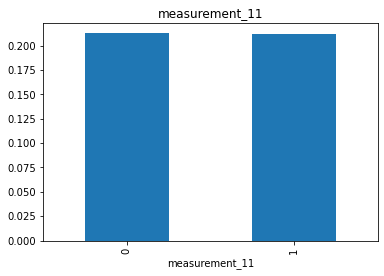

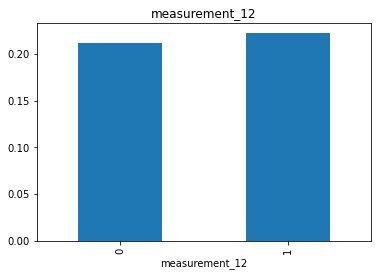

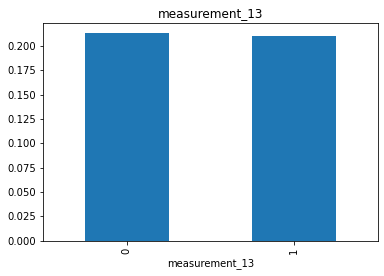

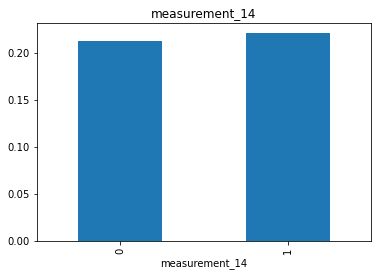

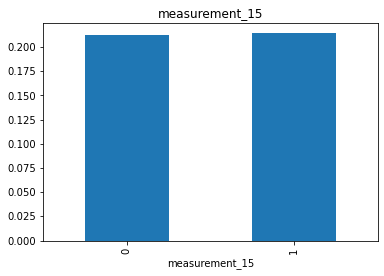

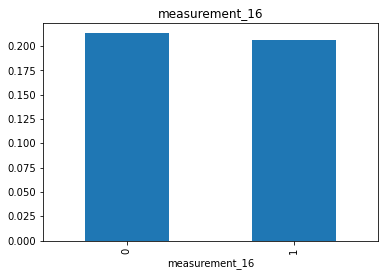

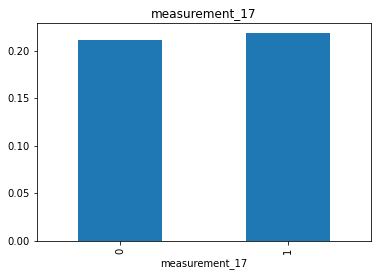

In [119]:
for feature in feature_with_nan:
    data1 = df.copy()
    data1[feature] = np.where(data1[feature].isnull(), 1, 0)
    data1.groupby(feature)['failure'].mean().plot.bar()
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

From the above graphs the missing value is important for predicting the target labels

#### Numerical Feature

In [120]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"Total: ", {len(numerical_feature)})
print(numerical_feature)

Total:  {23}
['id', 'loading', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17', 'failure']


#### Discrete Features

In [121]:
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25]
print(f"Total: {len(discrete_feature)}")
print(discrete_feature)

Total: 3
['attribute_2', 'attribute_3', 'failure']


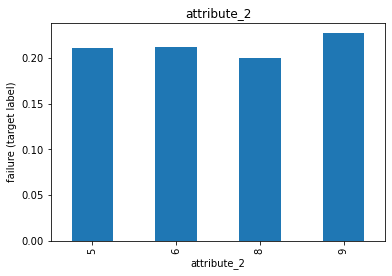

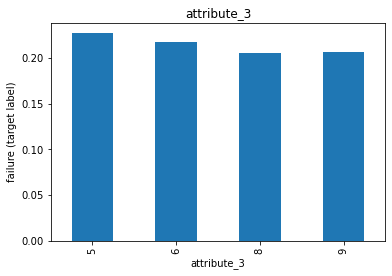

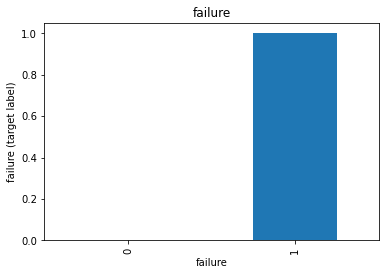

In [122]:
for feature in discrete_feature:
    data2 = df.copy()
    data2.groupby(feature)['failure'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("failure (target label)")
    plt.title(feature)
    plt.show()

#### Continous Feature

In [123]:
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print(f"Total: {len(continous_feature)}")
print(continous_feature)

Total: 20
['id', 'loading', 'measurement_0', 'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']


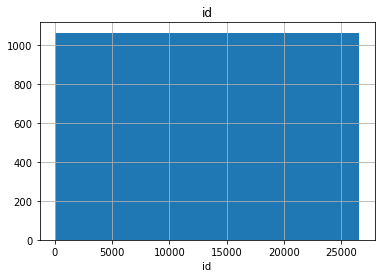

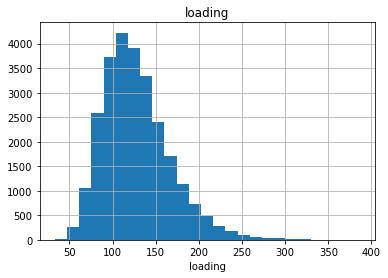

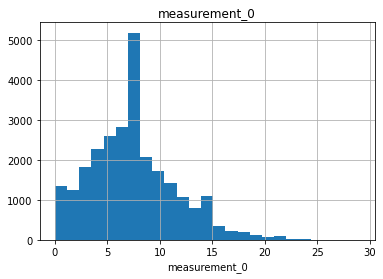

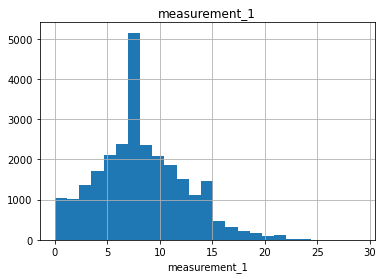

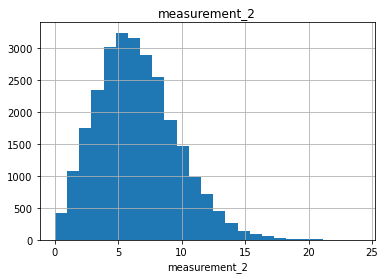

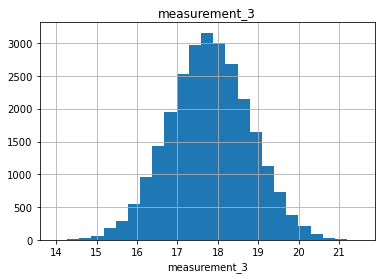

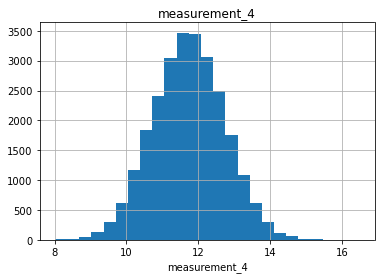

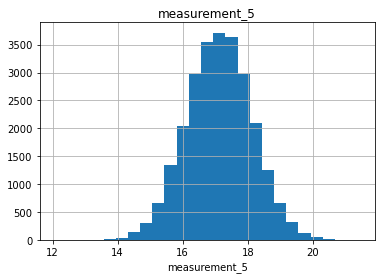

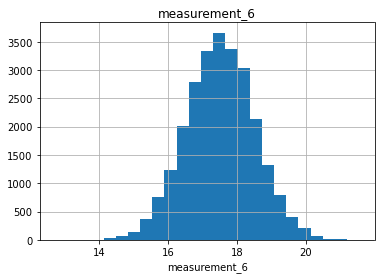

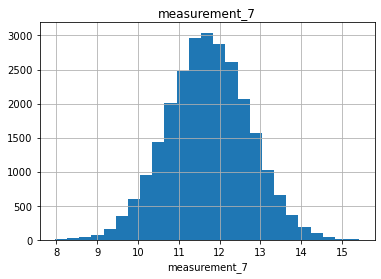

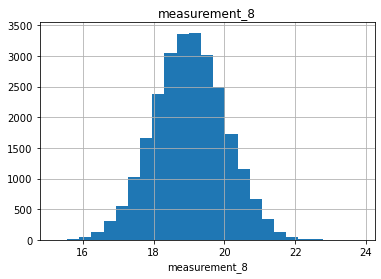

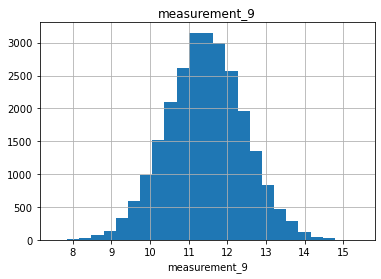

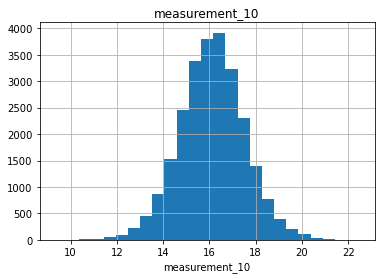

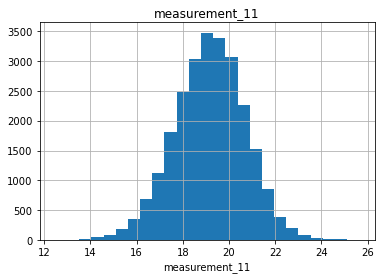

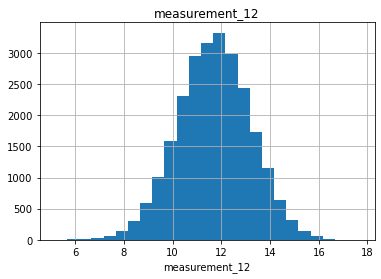

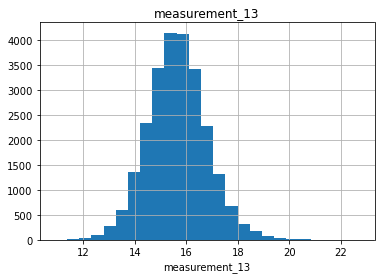

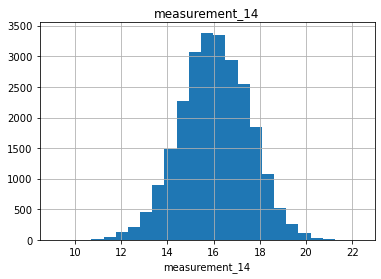

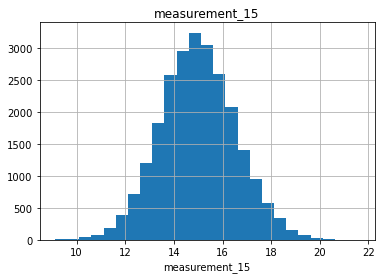

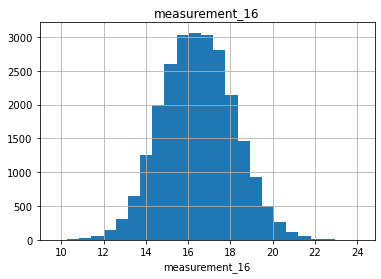

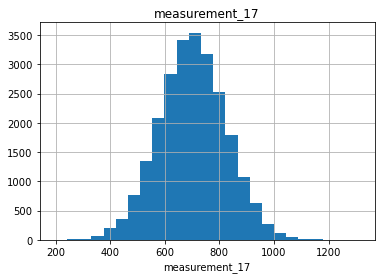

In [124]:
for feature in continous_feature:
    data3 = df.copy()
    data3[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

All the continous features are normally distributed or gaussian distributed. Thus, transformation is not required.

#### Checking for outliers using boxplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


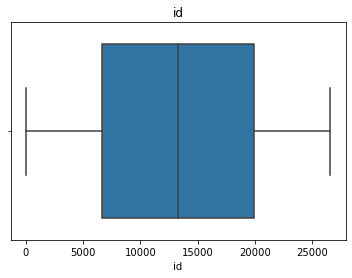

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


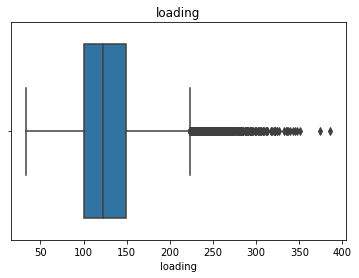

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


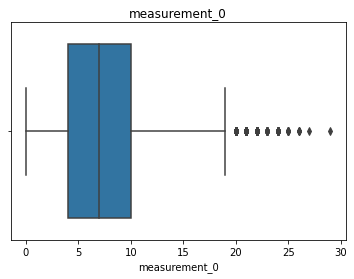

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


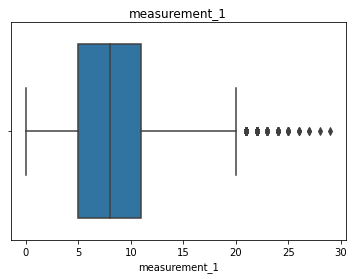

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


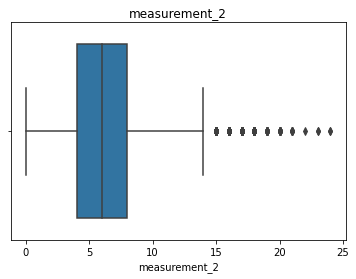

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


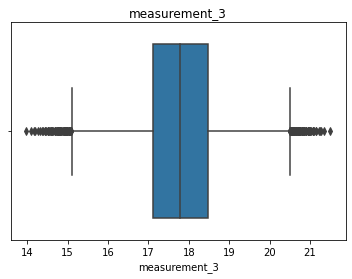

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


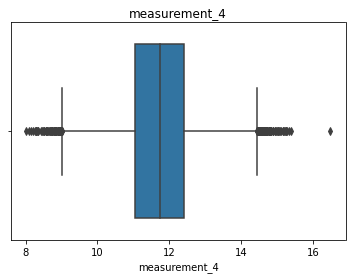

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


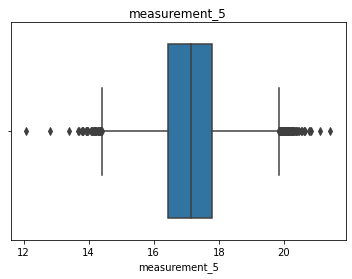

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


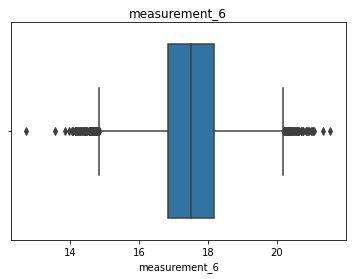

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


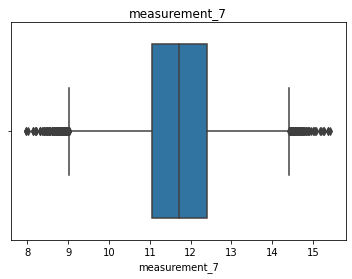

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


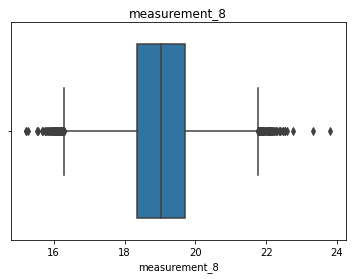

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


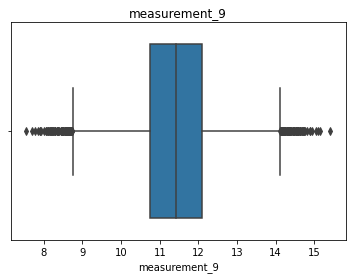

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


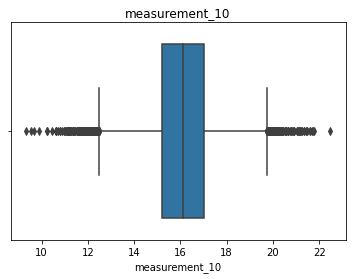

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


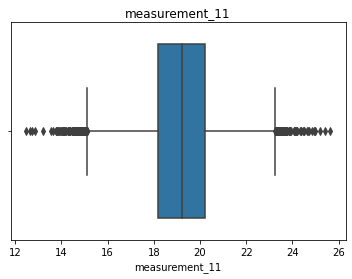

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


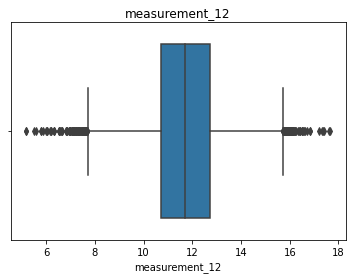

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


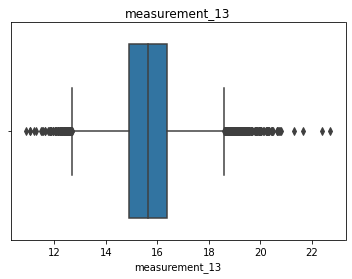

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


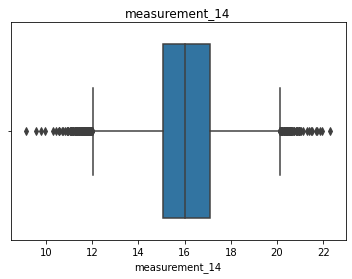

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


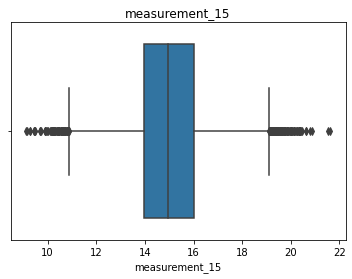

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


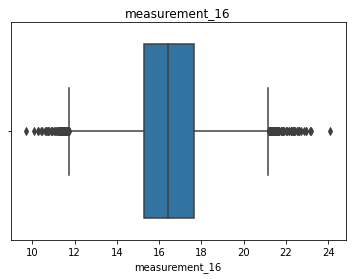

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


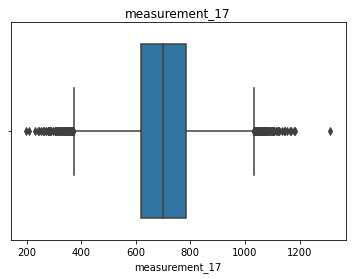

In [125]:
for feature in continous_feature:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

All the continous features contains outliers.

In [126]:
def outlier_handling(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_bound = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[variable].quantile(0.75) + (IQR * 1.5)
    df.loc[df[variable] >= upper_bound, variable] = upper_bound
    df.loc[df[variable] <= lower_bound, variable] = lower_bound

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


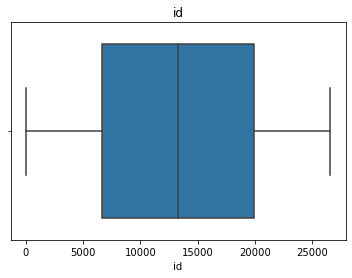

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


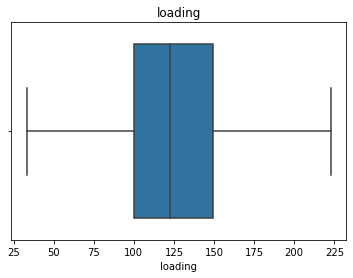

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


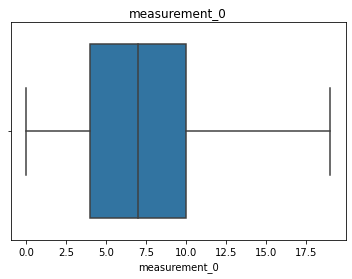

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


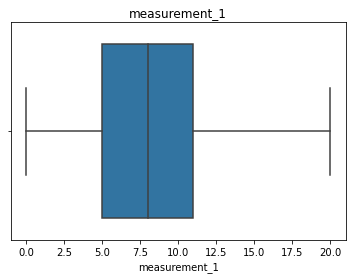

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


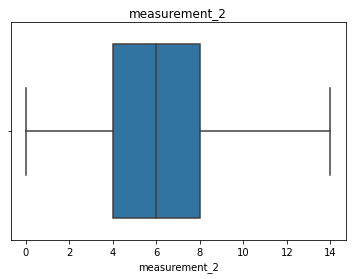

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


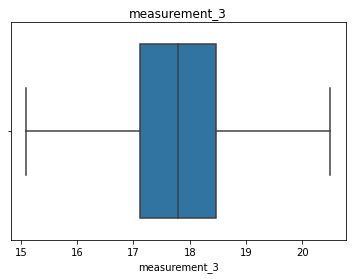

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


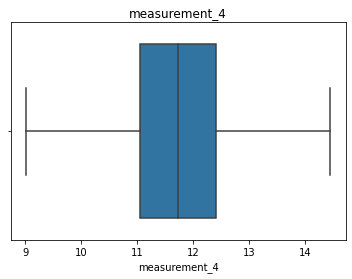

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


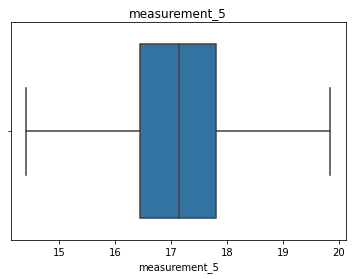

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


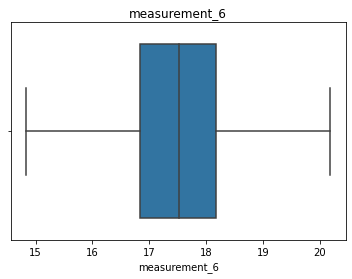

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


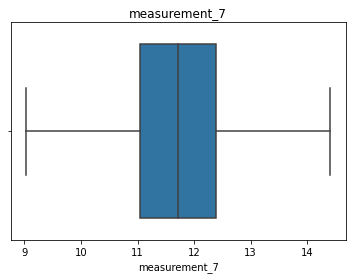

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


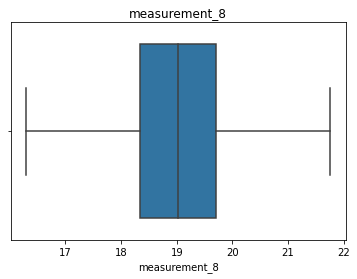

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


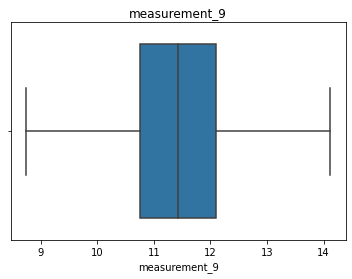

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


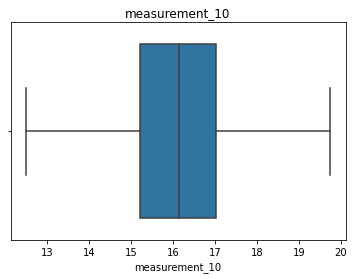

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


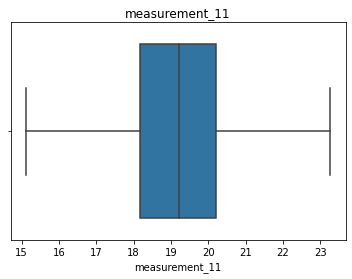

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


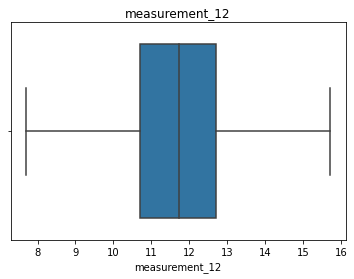

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


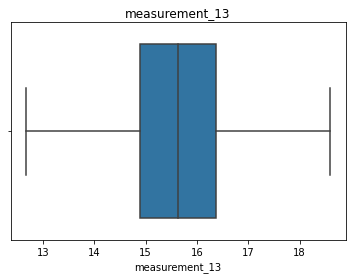

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


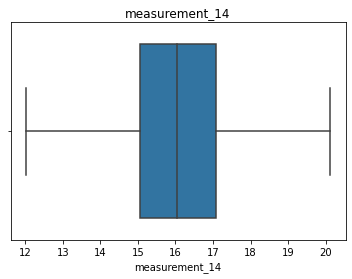

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


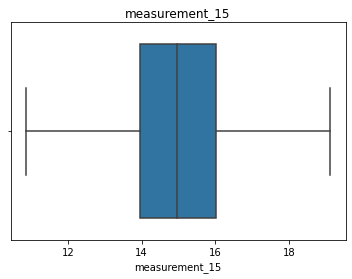

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


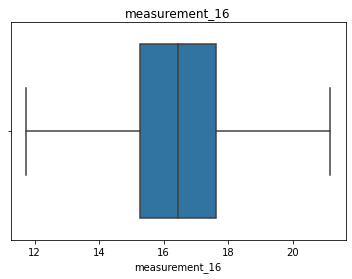

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


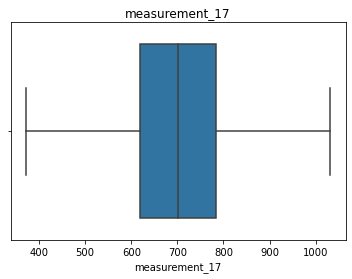

In [127]:
for feature in continous_feature:
    outlier_handling(df, feature)
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.xlabel(feature)
    plt.show()

All the outliers are removed from the continous features

In [128]:
df.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [129]:
def random_sample_imputation(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample

#### Categorical Features

In [130]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"Total: {len(categorical_feature)}")
print(categorical_feature)

Total: 3
['product_code', 'attribute_0', 'attribute_1']


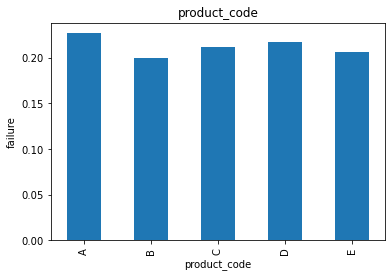

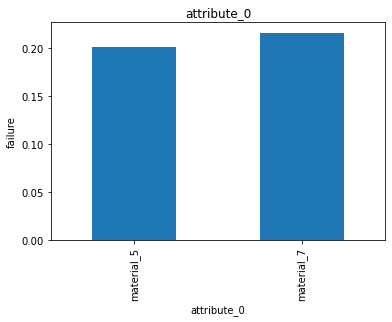

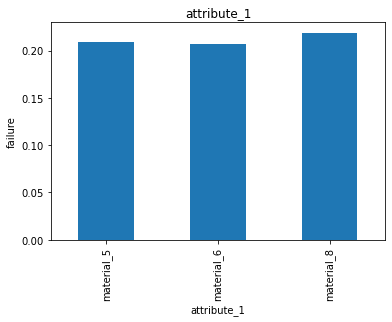

In [131]:
for feature in categorical_feature:
    data4 = df.copy()
    data4.groupby(feature)['failure'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('failure')
    plt.title(feature)
    plt.show()

Replacing all the categorical feature values with the count or the frequency

In [132]:
for feature in categorical_feature:
    count_dict = df[feature].value_counts().to_dict()
    df[feature] = df[feature].map(count_dict)

In [133]:
df.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0.0,5100,80.10,21320,10865,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1.0,5100,84.89,21320,10865,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2.0,5100,82.43,21320,10865,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3.0,5100,101.07,21320,10865,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4.0,5100,188.06,21320,10865,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [134]:
for feature in feature_with_nan:
    random_sample_imputation(df, feature)

In [135]:
df.isnull().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
failure           0
dtype: int64

In [136]:
X = df.drop(['id', 'failure'], axis=1)

In [137]:
Y = df['failure']

In [138]:
X.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,5100,80.10,21320,10865,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,15.922,13.034,14.684,764.100
1,5100,84.89,21320,10865,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057
2,5100,82.43,21320,10865,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,17.341,13.798,16.711,18.631,14.094,17.946,663.376
3,5100,101.07,21320,10865,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282
4,5100,188.06,21320,10865,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885


In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()

In [141]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [142]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [143]:
feature_sel_model.fit(X, Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [144]:
feature_sel_model.get_support()

array([ True,  True, False, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True])

In [145]:
selected_features = feature_sel_model.get_support()

In [146]:
new_features = X.columns[selected_features]

In [147]:
new_features

Index(['product_code', 'loading', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_4', 'measurement_17'],
      dtype='object')

In [148]:
X = df[new_features]

In [149]:
X.head()

,product_code,loading,measurement_0,measurement_1,measurement_2,measurement_4,measurement_17
0,5100,80.10,7,8,4,12.518,764.100
1,5100,84.89,14,3,3,11.540,682.057
2,5100,82.43,12,1,5,11.652,663.376
3,5100,101.07,13,2,6,11.188,826.282
4,5100,188.06,9,2,8,12.950,579.885


In [150]:
X = scaler.fit_transform(X)

In [151]:
X[0]

array([-0.90674272, -1.27397412, -0.09745516, -0.0527052 , -0.69348827,
        0.7926833 ,  0.51234114])

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [154]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19927, 7), (19927,), (6643, 7), (6643,))

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rf = RandomForestClassifier()

In [157]:
rf.fit(X_train ,y_train)

RandomForestClassifier()

In [158]:
y_rf_pred_train = rf.predict(X_train)

In [159]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [160]:
print(accuracy_score(y_train, y_rf_pred_train))
print(classification_report(y_train, y_rf_pred_train))
print(confusion_matrix(y_train, y_rf_pred_train))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15732
           1       1.00      1.00      1.00      4195

    accuracy                           1.00     19927
   macro avg       1.00      1.00      1.00     19927
weighted avg       1.00      1.00      1.00     19927

[[15732     0]
 [    0  4195]]


In [161]:
y_rf_pred_test = rf.predict(X_test)

In [162]:
print(accuracy_score(y_test, y_rf_pred_test))
print(classification_report(y_test, y_rf_pred_test))
print(confusion_matrix(y_test, y_rf_pred_test))

0.7781122986602439
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      5189
           1       0.25      0.01      0.01      1454

    accuracy                           0.78      6643
   macro avg       0.52      0.50      0.44      6643
weighted avg       0.67      0.78      0.69      6643

[[5159   30]
 [1444   10]]


In [163]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

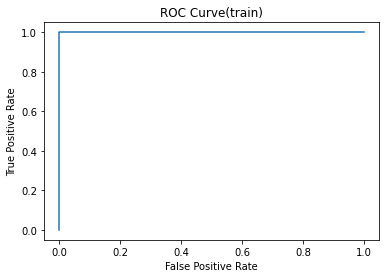

Area under the curve is: 1.0


In [164]:
rf_fpr, rf_tpr, _rf = roc_curve(y_train, rf.predict_proba(X_train)[:, 1])
plt.plot(rf_fpr, rf_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(train)")
plt.show()
print(f"Area under the curve is: {roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])}")

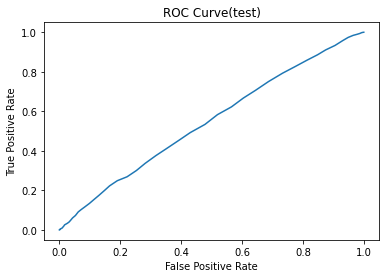

Area under the curve is: 0.547768888954865


In [165]:
rf_fpr_t, rf_tpr_t, _rf_t = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(rf_fpr_t, rf_tpr_t)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(test)")
plt.show()
print(f"Area under the curve is: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}")

The above model is overfitting the dataset.

In [166]:
from sklearn.ensemble import AdaBoostClassifier

In [167]:
ad = AdaBoostClassifier()

In [168]:
ad.fit(X_train, y_train)
y_ad_pred_train = ad.predict(X_train)

In [169]:
print(accuracy_score(y_train, y_ad_pred_train))
print(classification_report(y_train, y_ad_pred_train))
print(confusion_matrix(y_train, y_ad_pred_train))

0.7895317910372861
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     15732
           1       1.00      0.00      0.00      4195

    accuracy                           0.79     19927
   macro avg       0.89      0.50      0.44     19927
weighted avg       0.83      0.79      0.70     19927

[[15732     0]
 [ 4194     1]]


In [170]:
y_ad_pred_test = ad.predict(X_test)

In [171]:
print(accuracy_score(y_test, y_ad_pred_test))
print(classification_report(y_test, y_ad_pred_test))
print(confusion_matrix(y_test, y_ad_pred_test))

0.7811229866024386
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5189
           1       0.50      0.00      0.00      1454

    accuracy                           0.78      6643
   macro avg       0.64      0.50      0.44      6643
weighted avg       0.72      0.78      0.69      6643

[[5188    1]
 [1453    1]]


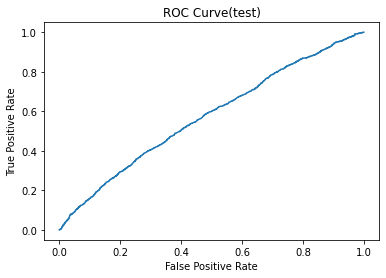

Area under the curve is: 0.5741412701665225


In [172]:
ad_fpr_t, ad_tpr_t, _ad_t = roc_curve(y_test, ad.predict_proba(X_test)[:, 1])
plt.plot(ad_fpr_t, ad_tpr_t)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(test)")
plt.show()
print(f"Area under the curve is: {roc_auc_score(y_test, ad.predict_proba(X_test)[:, 1])}")

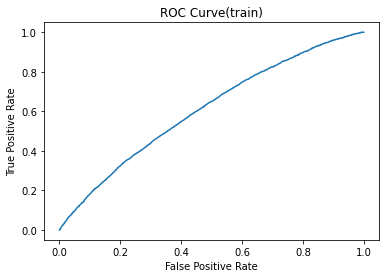

Area under the curve is: 0.6085722426932405


In [173]:
ad_fpr, ad_tpr, _ad = roc_curve(y_train, ad.predict_proba(X_train)[:, 1])
plt.plot(ad_fpr, ad_tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve(train)")
plt.show()
print(f"Area under the curve is: {roc_auc_score(y_train, ad.predict_proba(X_train)[:, 1])}")

Using Adaboost Classifier Alogorithm it is not overfitting the dataset.


In [174]:
param_distribution = {
    'base_estimator' : [None],
    'n_estimators' : [int(x) for x in np.linspace(start=100, stop=1500, num=10)],
    'learning_rate' : [1.0, 1.1, 1.5, 3.2, 0.5, 4.5, 5.5],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [175]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [176]:
cv = KFold(n_splits=3, random_state=0, shuffle=True)

In [177]:
ad = AdaBoostClassifier()

In [178]:
ad_randomcv = RandomizedSearchCV(estimator=ad, param_distributions=param_distribution, n_iter=50, cv=cv, verbose=2, n_jobs=-1)

In [179]:
ad_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=AdaBoostClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'base_estimator': [None],
                                        'learning_rate': [1.0, 1.1, 1.5, 3.2,
                                                          0.5, 4.5, 5.5],
                                        'n_estimators': [100, 255, 411, 566,
                                                         722, 877, 1033, 1188,
                                                         1344, 1500]},
                   verbose=2)

In [180]:
best_params = ad_randomcv.best_params_

In [181]:
best_params

{'n_estimators': 255,
 'learning_rate': 5.5,
 'base_estimator': None,
 'algorithm': 'SAMME.R'}

In [182]:
param_grid = {
    'n_estimators' : [best_params['n_estimators']-200, best_params['n_estimators']-100,
                     best_params['n_estimators'], best_params['n_estimators']+100,
                     best_params['n_estimators']+200],
    'learning_rate' : [best_params['learning_rate']-0.05, best_params['learning_rate']-0.025,
                      best_params['learning_rate'], best_params['learning_rate']+0.025,
                      best_params['learning_rate']+0.05],
    'base_estimator' : [None],
    'algorithm' : [best_params['algorithm']]
}

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
ad_gridsearch = GridSearchCV(estimator=ad, param_grid=param_grid, cv=cv, verbose=2, n_jobs=-1)

In [185]:
ad_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME.R'], 'base_estimator': [None],
                         'learning_rate': [5.45, 5.475, 5.5, 5.525, 5.55],
                         'n_estimators': [55, 155, 255, 355, 455]},
             verbose=2)

In [186]:
ad_best_estimator = ad_gridsearch.best_estimator_

In [187]:
ad_best_estimator

AdaBoostClassifier(learning_rate=5.45, n_estimators=55)

In [188]:
y_pred_train = ad_best_estimator.predict(X_train)

In [189]:
print(accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

0.7894816078687208
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     15732
           1       0.00      0.00      0.00      4195

    accuracy                           0.79     19927
   macro avg       0.39      0.50      0.44     19927
weighted avg       0.62      0.79      0.70     19927

[[15732     0]
 [ 4195     0]]


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [190]:
y_pred_test = ad_best_estimator.predict(X_test)

In [191]:
print(accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

0.7811229866024386
[[5189    0]
 [1454    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5189
           1       0.00      0.00      0.00      1454

    accuracy                           0.78      6643
   macro avg       0.39      0.50      0.44      6643
weighted avg       0.61      0.78      0.69      6643



C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


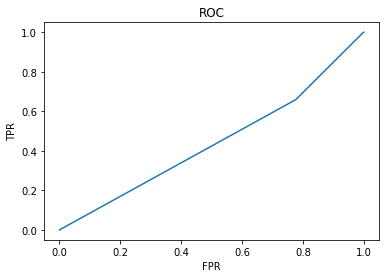

Area under the curve is:  0.44140542253181797


In [192]:
ad_fpr, ad_tpr, ad_ = roc_curve(y_train, ad_best_estimator.predict_proba(X_train)[:, 1])
plt.plot(ad_fpr, ad_tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.show()
print("Area under the curve is: ",roc_auc_score(y_train, ad_best_estimator.predict_proba(X_train)[:, 1]))

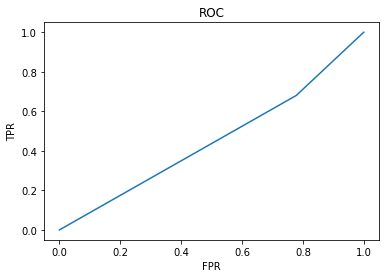

Area under the curve is:  0.45105096141637047


In [193]:
ad_fpr_test, ad_tpr_test, ad_test = roc_curve(y_test, ad_best_estimator.predict_proba(X_test)[:, 1])
plt.plot(ad_fpr_test, ad_tpr_test)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.show()
print("Area under the curve is: ", roc_auc_score(y_test, ad_best_estimator.predict_proba(X_test)[:, 1]))

The above model is not overfitting the dataset. Since, the gap between the training dataset and the test dataset is about 2%.

In [194]:
test = pd.read_csv('test.csv')

In [195]:
test.shape

(20775, 25)

In [196]:
test.isnull().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [197]:
feature_with_nan_test = [feature for feature in test.columns if test[feature].isnull().sum() > 0]

In [198]:
for feature in feature_with_nan_test:
    random_sample_imputation(test, feature)

In [199]:
test.isnull().sum()

id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [200]:
discrete_feature_test = [feature for feature in test.columns if test[feature].dtype != "O" and len(test[feature].unique()) < 25]

In [201]:
discrete_feature_test, discrete_feature

(['attribute_2', 'attribute_3'], ['attribute_2', 'attribute_3', 'failure'])

In [202]:
continous_feature_test = [feature for feature in test.columns if test[feature].dtype != 'O' and len(test[feature].unique()) >= 25]

In [203]:
len(continous_feature_test), len(continous_feature)

(20, 20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


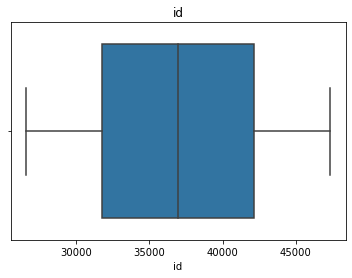

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


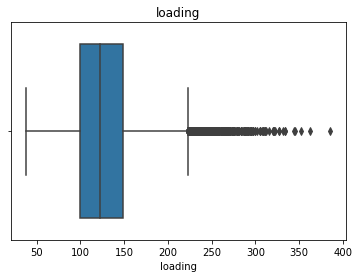

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


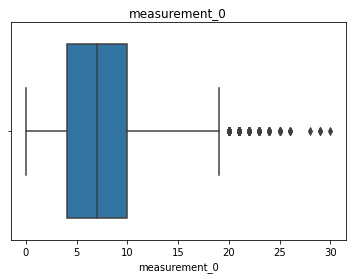

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


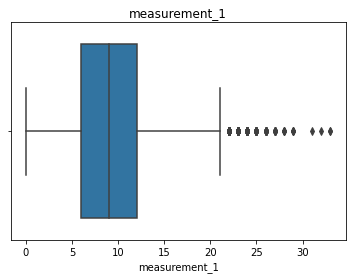

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


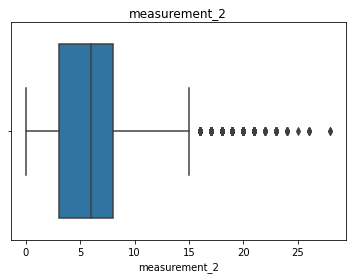

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


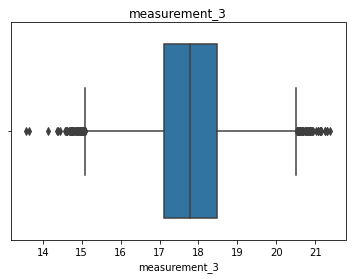

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


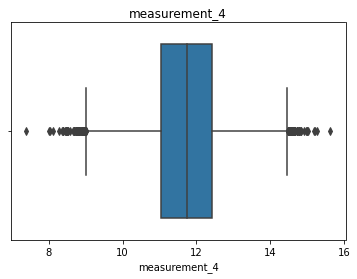

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


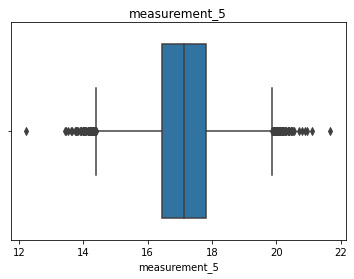

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


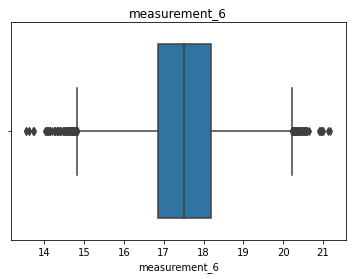

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


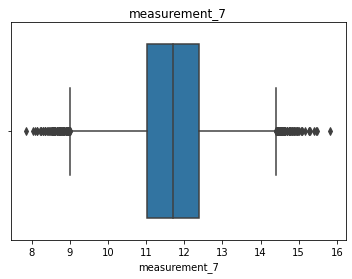

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


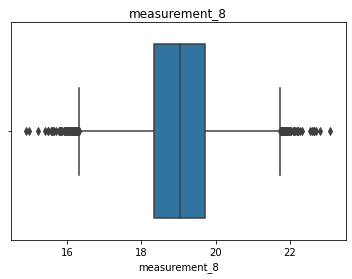

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


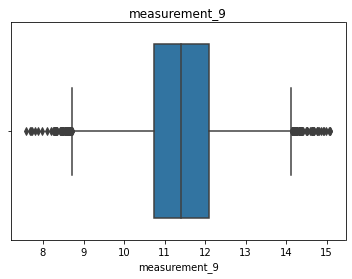

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


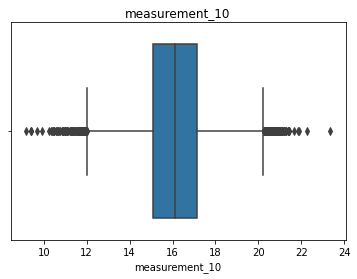

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


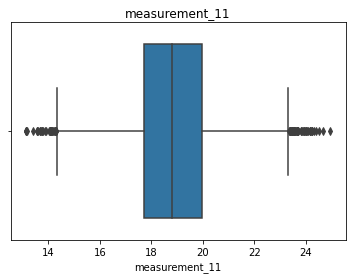

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


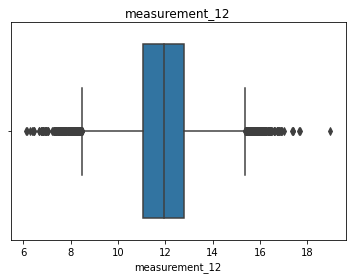

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


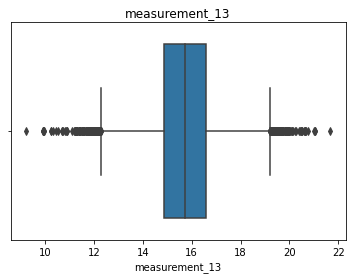

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


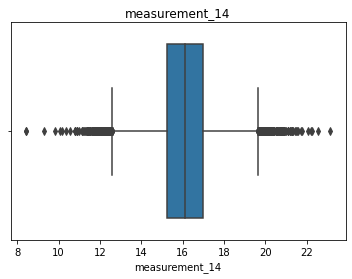

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


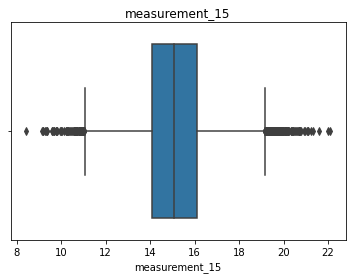

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


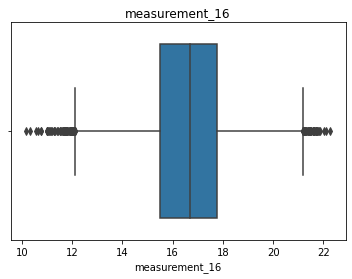

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


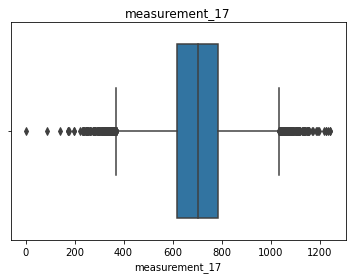

In [204]:
for feature in continous_feature_test:
    sns.boxplot(test[feature])
    plt.title(feature)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


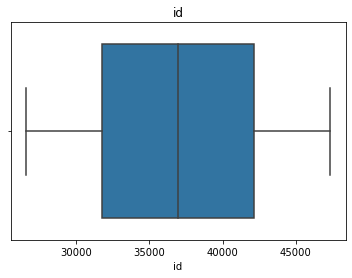

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


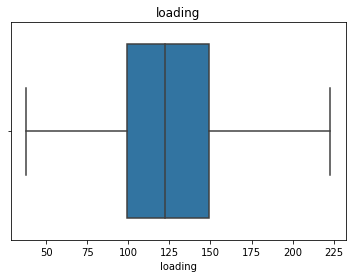

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


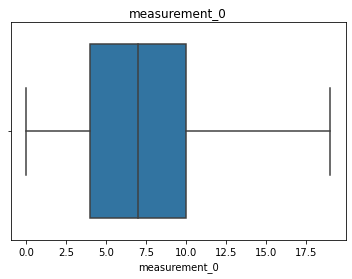

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


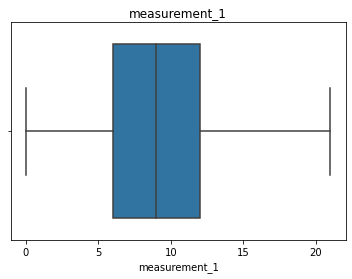

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


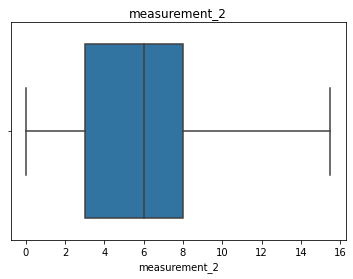

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


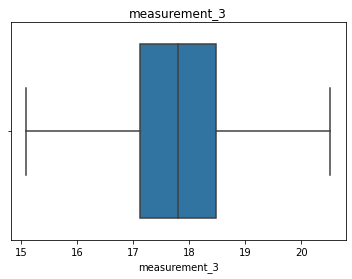

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


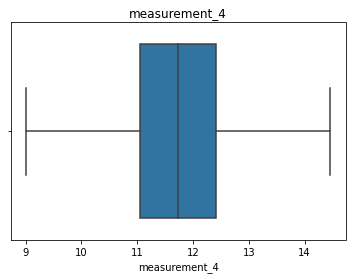

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


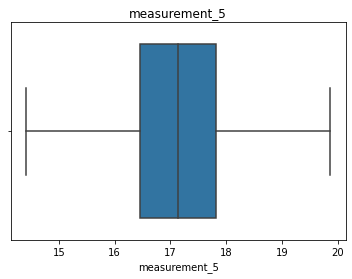

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


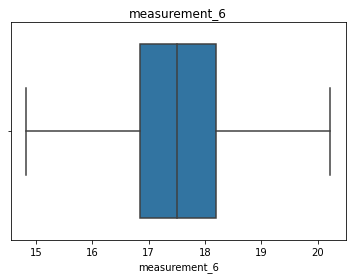

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


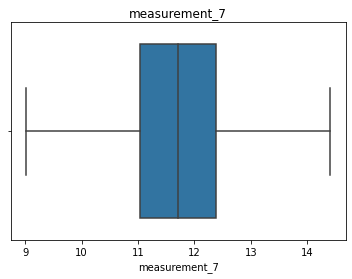

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


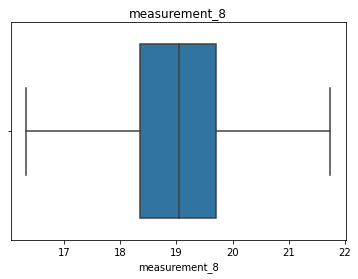

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


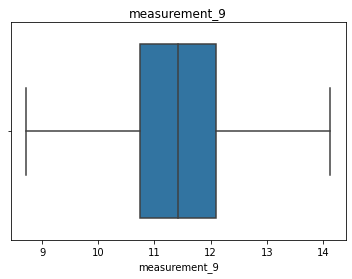

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


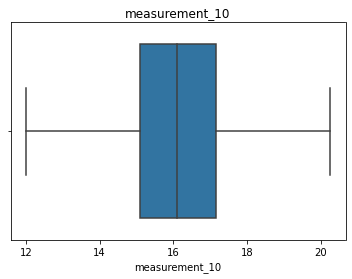

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


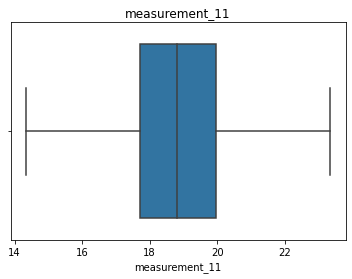

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


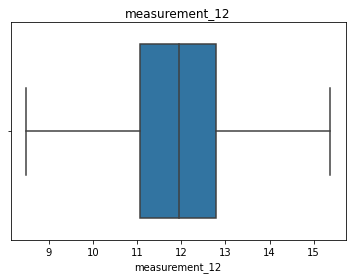

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


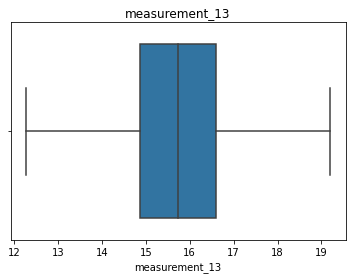

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


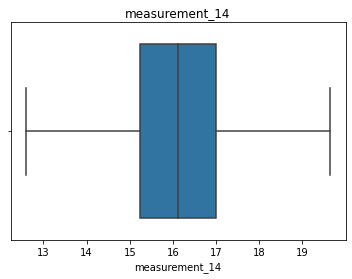

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


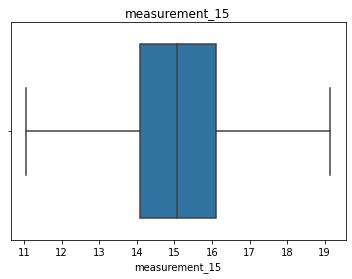

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


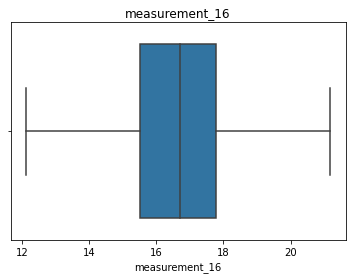

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


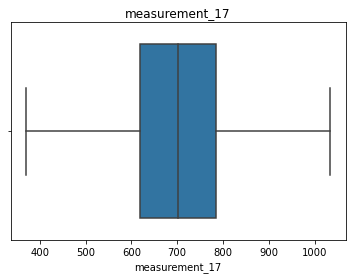

In [205]:
for feature in continous_feature_test:
    outlier_handling(test, feature)
    sns.boxplot(test[feature])
    plt.title(feature)
    plt.show()

In [206]:
categorical_feature_test = [feature for feature in test.columns if test[feature].dtype == "O"]

In [207]:
categorical_feature_test

['product_code', 'attribute_0', 'attribute_1']

In [208]:
for feature in categorical_feature_test:
    count_dict_test = test[feature].value_counts().to_dict()
    test[feature] = test[feature].map(count_dict_test)

In [209]:
test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,5422,119.57,10529,10529,6,4,6,9,6.0,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,5422,113.51,10529,10529,6,4,11,8,0.0,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,18.743,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,5422,112.16,10529,10529,6,4,8,12,4.0,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,5422,112.72,10529,10529,6,4,8,11,10.0,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,5422,208.00,10529,10529,6,4,14,16,8.0,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [210]:
new_features

Index(['product_code', 'loading', 'measurement_0', 'measurement_1',
       'measurement_2', 'measurement_4', 'measurement_17'],
      dtype='object')

In [211]:
X_test_final = test[new_features]

In [212]:
X_test_final.head()

,product_code,loading,measurement_0,measurement_1,measurement_2,measurement_4,measurement_17
0,5422,119.57,6,9,6.0,10.178,634.612
1,5422,113.51,11,8,0.0,11.927,537.037
2,5422,112.16,8,12,4.0,10.481,658.995
3,5422,112.72,8,11,10.0,10.888,594.301
4,5422,208.00,14,16,8.0,12.693,801.044


In [213]:
X_test_final = scaler.fit_transform(X_test_final)

In [214]:
X_test_final[0]

array([ 1.47008943, -0.19983461, -0.34047484,  0.01476971, -0.01803309,
       -1.5475857 , -0.52581329])

In [215]:
id_column = test['id']

In [216]:
id_column = np.array(id_column)

In [217]:
id_column

array([26570, 26571, 26572, ..., 47342, 47343, 47344], dtype=int64)

In [218]:
prediction = ad_best_estimator.predict(X_test_final)

In [219]:
prediction.shape, id_column.shape

((20775,), (20775,))

In [220]:
dataFrame = pd.DataFrame([id_column, prediction])

In [221]:
dataFrame[1].value_counts()

26571    1
0        1
Name: 1, dtype: int64

In [222]:
dataFrame = dataFrame.T

In [223]:
dataFrame = dataFrame.rename(columns={0: 'id', 1: 'failure'})

In [224]:
dataFrame.to_csv('sample_submission.csv', index=False)

In [225]:
X_test.shape

(6643, 7)

In [227]:
X_test_final.shape

(20775, 7)

Logistic Regression

In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
lr = LogisticRegression()

In [230]:
lr_param_distribution = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'tol' : [1e-4, 1.1e-4, 1.2e-4, 0.9e-4, 0.8e-4] ,
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [int(x) for x in np.linspace(start=50, stop=1000, num=10)],
    'multi_class' : ['auto', 'ovr', 'multinomial'],
}

In [231]:
lr_randomcv = RandomizedSearchCV(estimator=lr, param_distributions=lr_param_distribution, n_iter=60, cv=cv, n_jobs=-1, verbose=2)

In [233]:
lr_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
93 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_mo

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=LogisticRegression(), n_iter=60, n_jobs=-1,
                   param_distributions={'max_iter': [50, 155, 261, 366, 472,
                                                     577, 683, 788, 894, 1000],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag', 'saga'],
                                        'tol': [0.0001, 0.00011, 0.00012, 9e-05,
                                                8e-05]},
                   verbose=2)

In [234]:
lr_best_params = lr_randomcv.best_params_

In [235]:
lr_best_params

{'tol': 9e-05,
 'solver': 'sag',
 'penalty': 'none',
 'multi_class': 'ovr',
 'max_iter': 50}

In [239]:
lr_param_grid = {
    'tol' : [lr_best_params['tol']-2e-6, lr_best_params['tol']-1e-6, lr_best_params['tol'],
            lr_best_params['tol']+1e-6, lr_best_params['tol']+2e-6],
    'solver' : [lr_best_params['solver']],
    'penalty' : [lr_best_params['penalty']],
    'multi_class' : [lr_best_params['multi_class']],
    'max_iter' : [lr_best_params['max_iter']-20, lr_best_params['max_iter']-10, 
                 lr_best_params['max_iter'], lr_best_params['max_iter']+10, 
                 lr_best_params['max_iter']+20, lr_best_params['max_iter']+100]
}

In [240]:
lr_gridcv = GridSearchCV(estimator=lr, param_grid=lr_param_grid, cv=cv, verbose=2, n_jobs=-1)

In [241]:
lr_gridcv.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [30, 40, 50, 60, 70, 150],
                         'multi_class': ['ovr'], 'penalty': ['none'],
                         'solver': ['sag'],
                         'tol': [8.800000000000001e-05, 8.900000000000001e-05,
                                 9e-05, 9.1e-05, 9.2e-05]},
             verbose=2)

In [242]:
lr_best_estimator = lr_gridcv.best_estimator_

In [243]:
lr_best_estimator

LogisticRegression(max_iter=30, multi_class='ovr', penalty='none', solver='sag',
                   tol=8.800000000000001e-05)

In [244]:
# Using the training dataset
y_lr_pred_train = lr_best_estimator.predict(X_train)

In [245]:
print(accuracy_score(y_train, y_lr_pred_train))
print(classification_report(y_train, y_lr_pred_train))
print(confusion_matrix(y_train, y_lr_pred_train))

0.7894816078687208
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     15732
           1       0.00      0.00      0.00      4195

    accuracy                           0.79     19927
   macro avg       0.39      0.50      0.44     19927
weighted avg       0.62      0.79      0.70     19927

[[15732     0]
 [ 4195     0]]


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [246]:
# Using test dataset
y_lr_pred_test = lr_best_estimator.predict(X_test)

In [247]:
print(accuracy_score(y_test, y_lr_pred_test))
print(classification_report(y_test, y_lr_pred_test))
print(confusion_matrix(y_test, y_lr_pred_test))

0.7811229866024386
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5189
           1       0.00      0.00      0.00      1454

    accuracy                           0.78      6643
   macro avg       0.39      0.50      0.44      6643
weighted avg       0.61      0.78      0.69      6643

[[5189    0]
 [1454    0]]


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


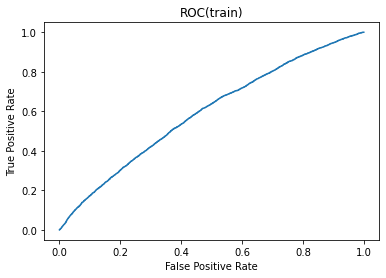

Area under the curve is:  0.5941937767498326


In [249]:
lr_fpr_train, lr_tpr_train, lr_train = roc_curve(y_train, lr_best_estimator.predict_proba(X_train)[:, 1])
plt.plot(lr_fpr_train, lr_tpr_train)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC(train)")
plt.show()
print(f"Area under the curve is: ", roc_auc_score(y_train, lr_best_estimator.predict_proba(X_train)[:, 1]))

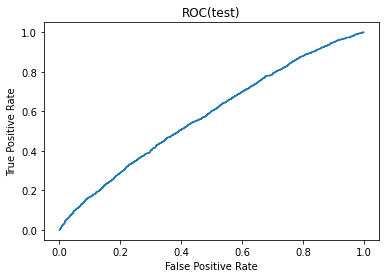

Area under the curve is:  0.5792622103205834


In [250]:
lr_fpr_test, lr_tpr_test, lr_test = roc_curve(y_test, lr_best_estimator.predict_proba(X_test)[:, 1])
plt.plot(lr_fpr_test, lr_tpr_test)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC(test)")
plt.show()
print("Area under the curve is: ", roc_auc_score(y_test, lr_best_estimator.predict_proba(X_test)[:, 1]))

The logistic Regression model is not overfitting the dataset. Since, the gap between the train and test dataset is: 2.5%

In [255]:
prediction_lr = lr_best_estimator.predict(X_test_final)

In [256]:
dataFrame2 = pd.DataFrame([id_column, prediction_lr])

In [257]:
dataFrame2 = dataFrame2.T

In [258]:
dataFrame2 = dataFrame2.rename(columns={0: 'id', 1: 'failure'})

In [259]:
dataFrame2.head()

,id,failure
0,26570,0
1,26571,0
2,26572,0
3,26573,0
4,26574,0


In [260]:
dataFrame2.to_csv('sample_submission_2.csv', index=False)

In [261]:
from sklearn.cluster import KMeans

In [262]:
km = KMeans(n_clusters=2)

In [263]:
km.fit(X_train, y_train)

KMeans(n_clusters=2)

In [264]:
y_km_pred_train = km.predict(X_train)

In [265]:
print(accuracy_score(y_train, y_km_pred_train))
print(classification_report(y_train, y_km_pred_train))
print(confusion_matrix(y_train, y_km_pred_train))

0.5701309780699554
              precision    recall  f1-score   support

           0       0.79      0.62      0.70     15732
           1       0.21      0.37      0.27      4195

    accuracy                           0.57     19927
   macro avg       0.50      0.50      0.48     19927
weighted avg       0.67      0.57      0.61     19927

[[9803 5929]
 [2637 1558]]


In [266]:
y_km_pred_train

array([0, 0, 1, ..., 0, 0, 1])

In [269]:
y_km_pred_test = km.predict(X_test)

In [270]:
print(accuracy_score(y_test, y_km_pred_test))
print(classification_report(y_test, y_km_pred_test))
print(confusion_matrix(y_test, y_km_pred_test))

0.5614933012193286
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      5189
           1       0.21      0.36      0.26      1454

    accuracy                           0.56      6643
   macro avg       0.49      0.49      0.48      6643
weighted avg       0.65      0.56      0.59      6643

[[3209 1980]
 [ 933  521]]


In [271]:
km_param_distribution = {
    'n_clusters' : [2],
    'init' : ['k-means++', 'random'],
    'n_init' : [int(x) for x in np.linspace(start=10, stop=150, num=10)],
    'max_iter' : [int(x)for x in np.linspace(start=300, stop=1000, num=10)],
    'tol' : [1e-4, 1.1e-4, 1.2e-4, 0.9e-4, 0.8e-4],
    'algorithm' : ['lloyd', 'elkan', 'auto', 'full']
}

In [272]:
km = KMeans()

In [273]:
km_randomcv = RandomizedSearchCV(estimator=km, param_distributions=km_param_distribution, n_iter=60, cv=cv, verbose=2, n_jobs=-1)

In [274]:
km_randomcv.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=KMeans(), n_iter=60, n_jobs=-1,
                   param_distributions={'algorithm': ['lloyd', 'elkan', 'auto',
                                                      'full'],
                                        'init': ['k-means++', 'random'],
                                        'max_iter': [300, 377, 455, 533, 611,
                                                     688, 766, 844, 922, 1000],
                                        'n_clusters': [2],
                                        'n_init': [10, 25, 41, 56, 72, 87, 103,
                                                   118, 134, 150],
                                        'tol': [0.0001, 0.00011, 0.00012, 9e-05,
                                                8e-05]},
                   verbose=2)

In [281]:
km_best_params = km_randomcv.best_params_

In [282]:
km_best_params

{'tol': 8e-05,
 'n_init': 10,
 'n_clusters': 2,
 'max_iter': 611,
 'init': 'k-means++',
 'algorithm': 'full'}

In [283]:
km_param_grid = {
    'tol' : [km_best_params['tol']-2e-6, km_best_params['tol']-1e-6, km_best_params['tol'],
            km_best_params['tol']+1e-6, km_best_params['tol']+2e-6],
    'n_clusters' : [2],
    'init' : ['k-means++'],
    'algorithm' : ['lloyd'],
    'max_iter' : [km_best_params['max_iter']-100, km_best_params['max_iter']-50, km_best_params['max_iter'],
                 km_best_params['max_iter']+50, km_best_params['max_iter']+100],
    'n_init' : [km_best_params['n_init']-2, km_best_params['n_init']-1, 
               km_best_params['n_init'], km_best_params['n_init']+1, km_best_params['n_init']+2]
}

In [284]:
km_gridcv = GridSearchCV(estimator=km, param_grid=km_param_grid, cv=cv, verbose=2, n_jobs=-1)

In [285]:
km_gridcv.fit(X_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KMeans(), n_jobs=-1,
             param_grid={'algorithm': ['lloyd'], 'init': ['k-means++'],
                         'max_iter': [511, 561, 611, 661, 711],
                         'n_clusters': [2], 'n_init': [8, 9, 10, 11, 12],
                         'tol': [7.800000000000001e-05, 7.900000000000001e-05,
                                 8e-05, 8.1e-05, 8.2e-05]},
             verbose=2)

In [286]:
km_best_estimator = km_gridcv.best_estimator_

In [288]:
# Using training dataset
y_km_pred_train = km_best_estimator.predict(X_train)

In [290]:
print(accuracy_score(y_train, y_km_pred_train))

0.42389722487077836


In [293]:
y_km_pred_test = km_best_estimator.predict(X_test)

In [294]:
print(accuracy_score(y_test, y_km_pred_test))

0.4320337197049526


In [295]:
y_km_pred_train = pd.DataFrame(y_km_pred_train)

In [296]:
y_km_pred_train.replace({
    0 : 1,
    1: 0
}, inplace=True)

In [297]:
y_km_pred_train = np.array(y_km_pred_train)

In [298]:
print(accuracy_score(y_train, y_km_pred_train))

0.5761027751292217


In [299]:
y_km_pred_test = pd.DataFrame(y_km_pred_test)

In [300]:
y_km_pred_test.replace({
    0: 1,
    1: 0
}, inplace=True)

In [301]:
y_km_pred_test = np.array(y_km_pred_test)

In [302]:
print(accuracy_score(y_test, y_km_pred_test))

0.5679662802950474


In [319]:
prediction_km = km_best_estimator.predict(X_test_final)

In [320]:
prediction_km = pd.DataFrame(prediction_km)

In [321]:
prediction_km.replace({
    0: 1,
    1 : 0
}, inplace=True)

In [322]:
prediction_km = np.array(prediction_km)

In [323]:
DataFrame3 = pd.DataFrame([id_column, prediction_km])

In [324]:
DataFrame3 = DataFrame3.T

In [325]:
DataFrame3 = DataFrame3.rename(columns={0: 'id', 1: 'failure'})

In [326]:
DataFrame3.head()

,id,failure
0,26570,[1]
1,26571,[1]
2,26572,[1]
3,26573,[1]
4,26574,[1]


In [327]:
DataFrame3['failure'].dtype

dtype('O')

In [328]:
DataFrame3['failure'] = DataFrame3['failure'].astype(int)

In [329]:
DataFrame3.head()

,id,failure
0,26570,1
1,26571,1
2,26572,1
3,26573,1
4,26574,1


In [330]:
DataFrame3.to_csv('sample_submission_3.csv', index=False)

In [331]:
prediction_km_1 = km_best_estimator.predict(X_test_final)

In [332]:
DataFrame_1 = pd.DataFrame([id_column, prediction_km_1])

In [333]:
DataFrame_1 = DataFrame_1.T

In [334]:
DataFrame_1 = DataFrame_1.rename(columns={0: 'id', 1: 'failure'})

In [335]:
DataFrame_1['failure'] = DataFrame_1['failure'].astype(int)

In [336]:
DataFrame_1.head()

,id,failure
0,26570,0
1,26571,0
2,26572,0
3,26573,0
4,26574,0


In [337]:
DataFrame_1.to_csv('sample_submission_4.csv', index=False)

In [338]:
from sklearn.neighbors import KNeighborsClassifier

In [339]:
kn = KNeighborsClassifier(n_neighbors=2)

In [340]:
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [341]:
y_kn_pred_train = kn.predict(X_train)
print(accuracy_score(y_train, y_kn_pred_train))

0.8345962764088924


In [342]:
y_kn_pred_test = kn.predict(X_test)
print(accuracy_score(y_test, y_kn_pred_test))

0.7582417582417582


Using K nearest classifier

In [343]:
kn_param_distribution = {
    'n_neighbors' : [2],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : [int(x) for x in np.linspace(start=30, stop=100, num=10)],
}

In [344]:
kn = KNeighborsClassifier()

In [345]:
kn_randomcv = RandomizedSearchCV(estimator=kn, param_distributions=kn_param_distribution, n_iter=100, cv=cv, verbose=2, n_jobs=-1)

In [346]:
kn_randomcv.fit(X_train, y_train)

C:\Users\19138\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 80 candidates, totalling 240 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30, 37, 45, 53, 61, 68,
                                                      76, 84, 92, 100],
                                        'n_neighbors': [2],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [347]:
kn_best_params = kn_randomcv.best_params_

In [348]:
kn_best_params

{'weights': 'uniform', 'n_neighbors': 2, 'leaf_size': 30, 'algorithm': 'auto'}

In [349]:
kn_param_grid = {
    'weights' : [kn_best_params['weights']],
    'n_neighbors' : [2],
    'leaf_size' : [kn_best_params['leaf_size']-10, kn_best_params['leaf_size']-5, 
                  kn_best_params['leaf_size'], kn_best_params['leaf_size']+5,
                  kn_best_params['leaf_size']+10],
    'algorithm' : [kn_best_params['algorithm']]
}

In [350]:
kn_gridcv = GridSearchCV(estimator=kn, param_grid=kn_param_grid, cv=cv, verbose=2, n_jobs=-1)

In [351]:
kn_gridcv.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'],
                         'leaf_size': [20, 25, 30, 35, 40], 'n_neighbors': [2],
                         'weights': ['uniform']},
             verbose=2)

In [352]:
kn_best_estimator = kn_gridcv.best_estimator_

In [353]:
y_kn_pred_train = kn_best_estimator.predict(X_train)

In [354]:
print(accuracy_score(y_train, y_kn_pred_train))

0.8345962764088924


In [355]:
y_kn_pred_test = kn_best_estimator.predict(X_test)

In [356]:
print(accuracy_score(y_test, y_kn_pred_test))

0.7582417582417582


In [358]:
prediction = kn_best_estimator.predict(X_test_final)

In [359]:
kn_DataFrame = pd.DataFrame([id_column, prediction])

In [360]:
kn_DataFrame = kn_DataFrame.T

In [361]:
kn_DataFrame.head()

,0,1
0,26570,0
1,26571,0
2,26572,0
3,26573,0
4,26574,0


In [362]:
kn_DataFrame = kn_DataFrame.rename(columns={0: 'id', 1: 'failure'})

In [363]:
kn_DataFrame.head()

,id,failure
0,26570,0
1,26571,0
2,26572,0
3,26573,0
4,26574,0


In [364]:
kn_DataFrame.to_csv('sample_submission_5.csv', index=False)